# TBATS - Trigonometric seasonality, Box-Cox transformation, ARMA errors, Trend and Seasonal components

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tbats import TBATS, BATS

Text(0, 0.5, 'y')

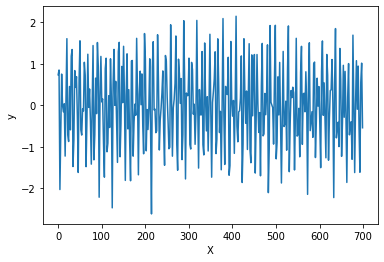

In [25]:
# Generate a time series
features = 1
f_1 = 2/3
f_2 = 2/5
n = 1000
X = np.linspace(0,1000, (n*features)).reshape((n, features))
y = np.sin(2 * np.pi * f_1 * X) + np.random.normal(0,0.3, (n, features)) + np.cos(2 * np.pi * f_2 *X)

train_rows = int(len(X)*0.7)
val_rows = int(len(X)*0.2 + train_rows)

X_train = X[:train_rows]
X_val = X[train_rows:val_rows]
X_test = X[val_rows:]

y_train = y[:train_rows]
y_val = y[train_rows:val_rows]
y_test = y[val_rows:]

y_train = (y_train - np.mean(y_train))/(np.std(y_train))
y_val = (y_val - np.mean(y_train))/(np.std(y_train))
y_test = (y_test - np.mean(y_train))/(np.std(y_train))

v = 2
plt.plot(X_train[::v], y_train[::v])
plt.xlabel("X")
plt.ylabel("y")

In [28]:
# Fit the model
estimator = TBATS(seasonal_periods=(3, 5))
model = estimator.fit(y_train)
# Forecast 365 days ahead
y_forecast = model.forecast(steps=100)

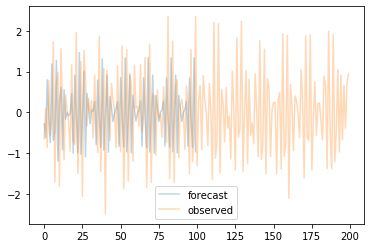

In [29]:
plt.plot(y_forecast, label = "forecast", alpha = 0.3)
plt.plot(y_val, label = "observed", alpha = 0.3)
plt.legend()